In [1]:
# This is an organized and detailed review of the homework in the last interview, followed by the new part

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./subjects-questions.csv', header=None, usecols=[0, 1], names=['question', 'category'])

In [4]:
df

,question,category
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics
...,...,...
122514,Which of the following group of\ncharacters is...,Biology
122515,Light year is the\nA. light emitted by the sun...,Physics
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology
122517,"In one average-life,\nA. half the active nucle...",Physics


In [5]:
# Start cleaning the data

In [6]:
df['category'].unique()

array(['Biology', 'Chemistry', 'Maths', 'Physics',
       ' \\quad \\boldsymbol{K}_{\\boldsymbol{p}}=\\mathbf{3} 2 \\boldsymbol{a} \\boldsymbol{t} \\boldsymbol{m}^{3} \\)',
       ' will this plant remain healthy for long?', nan, ' x \\in Z \\)',
       ' find in how many ways it is possible to make an unsuccessful attempt to open the lock.',
       ' \\cos ^{-1} \\sqrt{x}>\\sin ^{-1} \\sqrt{x} \\)',
       ' \\) find the area of the parallelogram.',
       ' \\mathbf{4} \\boldsymbol{x}+\\mathbf{2} \\boldsymbol{y}=\\mathbf{0} \\)',
       ' \\frac{6 x}{4 x-1}<\\frac{1}{2} \\)',
       ' \\mathbf{2} \\boldsymbol{x}-\\mathbf{5} \\boldsymbol{y}=\\mathbf{1} \\)',
       ' \\( \\int_{0}^{\\pi / 2} \\log \\sin 2 x d x \\)',
       ' \\( \\int_{0}^{\\frac{2}{3}} \\frac{d x}{4+9 x^{2}} \\)',
       ' \\) if \\( \\boldsymbol{y}=\\tan ^{-1}\\left(\\frac{\\sin \\boldsymbol{x}}{\\mathbf{1}+\\cos \\boldsymbol{x}}\\right) \\)',
       ' 29 x+37 y=21 \\)', ' \\boldsymbol{a}_{20} \\)',
       ' \\) fi

In [7]:
df['category'].isna().sum()

1

In [8]:
df['category'].value_counts()

Physics                                                                                                          38437
Chemistry                                                                                                        37766
Maths                                                                                                            33172
Biology                                                                                                          13123
 \mathbf{2} \boldsymbol{x}-\mathbf{5} \boldsymbol{y}=\mathbf{1} \)                                                   2
 \( \int_{0}^{\frac{2}{3}} \frac{d x}{4+9 x^{2}} \)                                                                  1
 \( \lim _{x \rightarrow 0}\left(\frac{x^{2}+x+1}{x+1}-a x-6\right)=4 \)                                             1
 will this plant remain healthy for long?                                                                            1
 find the area of the quadrilateral.            

In [9]:
# I saw in the data that there is a shift in tab for a few options - and one nan. But most of the data is in the categories: 
# Physics                                                                                                          38437
# Chemistry                                                                                                        37766
# Maths                                                                                                            33172
# Biology                                                                                                          13123

# Therefore we will take only this data into account (and save time) - the data is distributed pretty well, 
# maybe just except Biology category. However, I still don't think we should use here precision and recall.

In [10]:
df = df[df['category'].isin(['Physics', 'Chemistry', 'Maths', 'Biology'])]

In [11]:
df

,question,category
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics
...,...,...
122514,Which of the following group of\ncharacters is...,Biology
122515,Light year is the\nA. light emitted by the sun...,Physics
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology
122517,"In one average-life,\nA. half the active nucle...",Physics


In [12]:
df['category'].unique()

array(['Biology', 'Chemistry', 'Maths', 'Physics'], dtype=object)

In [13]:
df['question']

0         An anti-forest measure is\nA. Afforestation\nB...
1         Among the following organic acids, the acid pr...
2         If the area of two similar triangles are equal...
3         In recent year, there has been a growing\nconc...
4         Which of the following statement\nregarding tr...
                                ...                        
122514    Which of the following group of\ncharacters is...
122515    Light year is the\nA. light emitted by the sun...
122516    Member of Dipnoi are native of\nA. India.\nB. ...
122517    In one average-life,\nA. half the active nucle...
122518    State whether true or false.\nA magnetic field...
Name: question, Length: 122498, dtype: object

In [14]:
# From looking at the data according to the excel, we can see that there is a need to switch \n with " " (space). 
# We can also see by looking at the data there is a need to clean A, B, C, D (all or any of them) and backslashes '\\'

In [15]:
questions = df['question']

In [16]:
# After consulting with Danit, we will skip this part of cleaning.

In [17]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Lowering text
    - Removing backslashes
    - removes a. out of the answers
    - replaces 'b.', 'c.', and 'd.' with comma ','
    """
    text = text.lower()
    text = text.replace('\\', '') # generic replace was advised by Danit
    text = text.replace('a.', '')
    text = text.replace('b.', ',')
    text = text.replace('c.', ',')
    text = text.replace('d.', ',')
    
    return ' '.join(text.split())

In [18]:
new_questions = []
for question in questions:
    new_questions.append(clean_text(question))

In [19]:
new_questions

['an anti-forest measure is afforestation , selective grazing c . clearing forest , selective felling',
 'among the following organic acids, the acid present in rancid butter is: a . pyruvic acid , lactic acid , butyric acid , acetic acid',
 'if the area of two similar triangles are equal, then they are a . equilateral , isosceles , congruent , not congruent',
 'in recent year, there has been a growing concern about the gradually increasing average global temperatures. if this trend continues, would you expert the distributional range of some species to be affected?',
 'which of the following statement regarding transformer is incorrect? a transformer makes use of faradays law. , the ferromagnetic properties of an iron core is used by it to efficiently raise or lower ac voltage , it cannot increase power so that if the voltage is raised, the current is proportionally lowered and vice vers , the current induced in primary circuit is of same nature as in secondary circuit with difference

In [20]:
X = new_questions
y = df['category']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
# first feature extraction is BOW
# https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# this vectorizer will skip stop words
vectorizer = CountVectorizer(
    stop_words="english",
    preprocessor=clean_text
)

# fit the vectorizer on the training text
text_iterable = vectorizer.fit(X_train)
train_features_cv = text_iterable.transform(X_train)

In [26]:
# get the vectorizer's vocabulary
inv_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]

In [27]:
test_features_cv = vectorizer.transform(X_test)

In [28]:
# dataset is pretty balanced (except Biology), we can evaluate our model using the accuracy score (i.e., the proportion of samples that were correctly classified).

In [29]:
# linear SVM

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

# Training
model_svc = LinearSVC(max_iter=1000)
model_svc.fit(train_features_cv, y_train)
y_pred = model_svc.predict(test_features_cv)

# Evaluation
acc = accuracy_score(y_test, y_pred)

c:\users\borod\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [31]:
print("Accuracy: {:.2f}".format(acc*100))

Accuracy: 92.82


In [32]:
# it failed to converge but the result is good enough so we will leave it as it is (we had also checked it for max_iter=2000 in the previous file sent)

In [33]:
# TFIDF vectorizer with n-grams

In [34]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Transform each text into a vector of word counts
tfidf_vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

training_features_tfidf = tfidf_vectorizer.fit_transform(X_train)    
test_features_tfidf = tfidf_vectorizer.transform(X_test)

# Training
model_svc_tfidf = LinearSVC()
model_svc_tfidf.fit(training_features_tfidf, y_train)
y_pred = model_svc_tfidf.predict(test_features_tfidf)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(acc*100))

Accuracy: 94.45


In [35]:
# 2 precent higher!

In [36]:
# in the previous file sent, we had seen the linear SVM with TfIDF as an input is the best model, 
# therefore we will skip other models in this file

In [37]:
# confusion matrix for the previous model which was found to be the best

In [38]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

acc = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(acc*100))

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

Accuracy: 94.45
[[2409  126   25   48]
 [ 130 6973   70  356]
 [  18   29 6482  107]
 [  18  292  141 7276]]


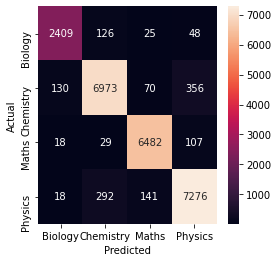

In [39]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
# category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['category'].drop_duplicates().sort_values(), yticklabels=df['category'].drop_duplicates().sort_values())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
# sum mistake of bilogy is: 126+25+48=149
# sum mistake of chemistry is: 130+70+356 = 556 
# sum mistake of maths is: 18 + 29 + 107 = 154
# sum mistake of physics is: 18 + 292 + 141 = 351

# you can see than even there was only a third of biology instaces compared to all others, the rate of mistake was pretty similar
# (perhaps except math which is better)

# also you can see that there were many mistakes Physics for Chemistry (and not the other way around). - I am not sure about the explanation for it.
# There was also  more of biology-chemisitry and maths-physics confusions
# However, I believe more mistakes are caused due to a more similarity between the fields and perhaps certain words that can be used in both of the fields

In [41]:
# To conclude we achieved 94.45% result using TfIdfVectorizer function over the words and bi-grams and applying Linear SVM algorithm

In [42]:
# Question 2: Could a word embedding model be of use for this task? Do not implement it, this is a
# discussion question to be answered in text
# Answer: As we disccussed on phone word embeddings contain more data and can point certain word like lime-tree and pine-tree are pretty 
# similar. Pre-trained word embeddings can also help to avoid leaving new words which were not seen during training as 0. 

# However, what I mentioned in the text is according to the bottom of this reference: https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73
# What Next?
# Features resulting from count-based vectorization methods like TF-IDF have some disadvantages. For instance:
# They don’t account for word position and context (despite using N-grams, which is only a quick fix).
# TF-IDF word vectors are usually very high dimensional (>1M features if using bi-grams).
# They are not able to capture semantics.
# For this reason, many applications today rely on word embeddings and neural networks, which together can achieve state-of-the-art results. This will be the topic of a future post so stay tuned!

In [43]:
# questions 3 - use keras

In [44]:
# https://realpython.com/python-keras-text-classification/

In [100]:
from keras.models import Sequential
from keras import layers

input_dim = train_features_cv.shape  # Number of features
print(input_dim)
number_features = input_dim[1]

model_dnn = Sequential()
model_dnn.add(layers.Dense(10, input_dim=number_features, activation='relu'))
model_dnn.add(layers.Dense(4, activation='sigmoid'))

(97998, 38913)


In [101]:
model_dnn.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
# from keras import optimizers
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
# model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                389140    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 389,184
Trainable params: 389,184
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
import numpy as np

# target = y_train
label_encoder = LabelEncoder()
y_train_labeled = np.array(label_encoder.fit_transform(y_train))
y_test_labeled = np.array(label_encoder.transform(y_test))

y_train_onehot = to_categorical(y_train_labeled)
y_test_onehot = to_categorical(y_test_labeled)

In [103]:
history = model_dnn.fit(train_features_cv, y_train_onehot, epochs=100, verbose=2, validation_data=(test_features_cv, y_test_onehot), batch_size=10000)

Epoch 1/100


C:\Users\borod\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


10/10 - 3s - loss: 1.3349 - accuracy: 0.6289 - val_loss: 1.2669 - val_accuracy: 0.8113
Epoch 2/100
10/10 - 1s - loss: 1.2067 - accuracy: 0.8412 - val_loss: 1.1382 - val_accuracy: 0.8611
Epoch 3/100
10/10 - 1s - loss: 1.0793 - accuracy: 0.8770 - val_loss: 1.0191 - val_accuracy: 0.8801
Epoch 4/100
10/10 - 1s - loss: 0.9623 - accuracy: 0.8910 - val_loss: 0.9119 - val_accuracy: 0.8874
Epoch 5/100
10/10 - 1s - loss: 0.8585 - accuracy: 0.8981 - val_loss: 0.8186 - val_accuracy: 0.8925
Epoch 6/100
10/10 - 1s - loss: 0.7689 - accuracy: 0.9037 - val_loss: 0.7392 - val_accuracy: 0.8968
Epoch 7/100
10/10 - 1s - loss: 0.6929 - accuracy: 0.9089 - val_loss: 0.6723 - val_accuracy: 0.9018
Epoch 8/100
10/10 - 1s - loss: 0.6288 - accuracy: 0.9138 - val_loss: 0.6161 - val_accuracy: 0.9065
Epoch 9/100
10/10 - 1s - loss: 0.5745 - accuracy: 0.9184 - val_loss: 0.5686 - val_accuracy: 0.9114
Epoch 10/100
10/10 - 1s - loss: 0.5282 - accuracy: 0.9225 - val_loss: 0.5281 - val_accuracy: 0.9149
Epoch 11/100
10/10 - 

Epoch 84/100
10/10 - 1s - loss: 0.0918 - accuracy: 0.9748 - val_loss: 0.2132 - val_accuracy: 0.9353
Epoch 85/100
10/10 - 1s - loss: 0.0910 - accuracy: 0.9750 - val_loss: 0.2133 - val_accuracy: 0.9354
Epoch 86/100
10/10 - 1s - loss: 0.0901 - accuracy: 0.9751 - val_loss: 0.2135 - val_accuracy: 0.9356
Epoch 87/100
10/10 - 1s - loss: 0.0893 - accuracy: 0.9753 - val_loss: 0.2138 - val_accuracy: 0.9355
Epoch 88/100
10/10 - 1s - loss: 0.0885 - accuracy: 0.9754 - val_loss: 0.2140 - val_accuracy: 0.9356
Epoch 89/100
10/10 - 1s - loss: 0.0878 - accuracy: 0.9757 - val_loss: 0.2142 - val_accuracy: 0.9354
Epoch 90/100
10/10 - 1s - loss: 0.0870 - accuracy: 0.9759 - val_loss: 0.2145 - val_accuracy: 0.9355
Epoch 91/100
10/10 - 1s - loss: 0.0862 - accuracy: 0.9761 - val_loss: 0.2148 - val_accuracy: 0.9351
Epoch 92/100
10/10 - 1s - loss: 0.0855 - accuracy: 0.9763 - val_loss: 0.2151 - val_accuracy: 0.9353
Epoch 93/100
10/10 - 1s - loss: 0.0848 - accuracy: 0.9763 - val_loss: 0.2154 - val_accuracy: 0.9356


In [76]:
# batch size was increased from 10 to 10,000 in order to save time, categorical_loss was used, and a default adam optimizer
# However it still didn't go beyond the 94.45% validation accuracy (there is a small overfit which I believe is natural) 
# let's try with more epochs:

In [104]:
# history = model_dnn.fit(train_features_cv, y_train_onehot, epochs=10000, verbose=2, validation_data=(test_features_cv, y_test_onehot), batch_size=10000)

In [105]:
# stopped since the over fitting was getting worse

In [79]:
from keras.backend import clear_session
clear_session()

In [106]:
loss, accuracy = model_dnn.evaluate(train_features_cv, y_train_onehot, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_dnn.evaluate(test_features_cv, y_test_onehot, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9778
Testing Accuracy:  0.9348


In [ ]:
# val_accuracy: 0.9361 was at certain point, which means we weren't able to supress the previous model, but let's get further

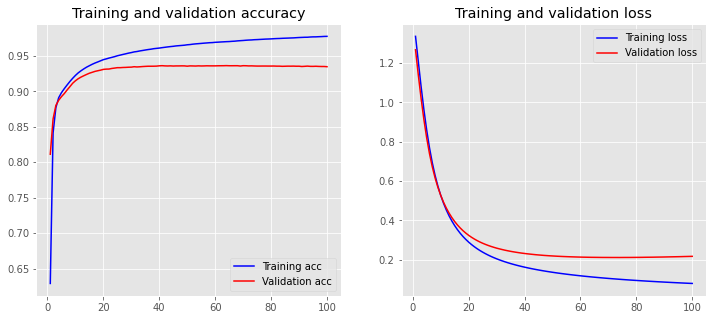

In [107]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [ ]:
# you can see we trained for pretty long and the data was overfitted a bit

In [ ]:
# perhaps dropout should be used?

In [ ]:
# question 4

In [ ]:
# trying to look at: https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

In [33]:
import numpy as np

maxlen = max([len(xt.split()) for xt in X_train])
print(maxlen)

564


In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()  # num_words=5000
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

In [42]:
from fractions import Fraction

def fraction_2_float(s):
    return float(sum(Fraction(_s) for _s in s.split()))

def str_2_float(s):
    try:
        return float(s)
    except:
        return fraction_2_float(s)

In [43]:
# Glove from here: http://vectors.nlpl.eu/repository/# - Stnford Site wasn't working
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

# glove_file = open('/content/drive/My Drive/Colab Datasets/glove.6B.100d.txt', encoding="utf8")
glove_file = open(r'C:\Users\borod\Downloads\Glove8NoLemmatiziation\model.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = ' '.join(records[0:-300])
#     if word == '2':
#         print(line)
    vector_dimensions = asarray([str_2_float(record) for record in records[-300:]])
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [44]:
print(len(embeddings_dictionary))
# print(len(embeddings_dictionary['<dfn id="">']))
# print((embeddings_dictionary['also']))

302816


In [45]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
#     print(index)
#     print("word: " + str(word))
    embedding_vector = embeddings_dictionary.get(word)
#     print(embedding_vector)
    if embedding_vector is not None:
#         print(len(embedding_vector))
        if len(embedding_vector) != 300:
            raise Exception(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#     else:
#         embedding_matrix[index] = embeddings_dictionary.get('<unk>')

In [111]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.4979092955934384

In [93]:
# less then 50 precent of our words are covered by the vocabulary which is very poor - looks like the glove we chost is inappropriate

In [30]:
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers import LSTM  # , Flatten
from keras.layers.core import Dense
from keras.models import Model

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(4, activation='sigmoid')(LSTM_Layer_1)
model_embeddings = Model(inputs=deep_inputs, outputs=dense_layer_1)

model_embeddings.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_embeddings.summary())

In [96]:
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True)  # to_file='model_plot4a.png'

In [97]:
history = model_embeddings.fit(X_train_padded, y_train_onehot, epochs=5, verbose=2, validation_data=(X_test_padded, y_test_onehot), batch_size=1000)

Epoch 1/5


KeyboardInterrupt: 

In [98]:
# batch size of 10,000 was too big and run into OOM - I used 1000 batch this time. 
# However, now it takes too long

In [115]:
from keras.models import Sequential
from keras import layers

embedding_dim = 300

model_embedding2 = Sequential()
model_embedding2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model_embedding2.add(layers.GlobalMaxPool1D())
model_embedding2.add(layers.Dense(10, activation='relu'))
model_embedding2.add(layers.Dense(4, activation='sigmoid'))
model_embedding2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_embedding2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 564, 300)          12125100  
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 44        
Total params: 12,128,154
Trainable params: 12,128,154
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
96/96 - 130s - loss: 0.9612 - accuracy: 0.7113 - val_loss: 0.5116 - val_accuracy: 0.8316
Epoch 2/20
96/96 - 129s - loss: 0.3667 - accuracy: 0.8721 - val_loss: 0.2486 - val_accuracy: 0.9281
Epoch 3/20
96/96 - 128s - loss: 0.1932 - accuracy: 0.9387 - val_loss: 0.1832 - val_accuracy: 0.9394
Epoch 4/20
96/96 - 129s - loss: 0.1452 - accuracy: 0.9508 - val_loss: 0.1675 - val_accuracy: 0.9417
Epoch 5/20
96/96 - 128s - loss: 0.1199 - accuracy: 0.9591 - val_loss: 0.1613 - val_accuracy: 0.9429
Epoch 6/20
96/96 - 127s - loss: 0.1013 - accuracy: 0.9663 - val_loss: 0.1588 - val_accuracy: 0.9434
Epoch 7/20
96/96 - 128s - loss: 0.0855 - accuracy: 0.9718 - val_loss: 0.1591 - val_accuracy: 0.9434
Epoch 8/20
96/96 - 127s - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.1610 - val_accuracy: 0.9442
Epoch 9/20
96/96 - 127s - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.1648 - val_accuracy: 0.9441
Epoch 10/20
96/96 - 127s - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.1692 - val_accuracy: 0.9438

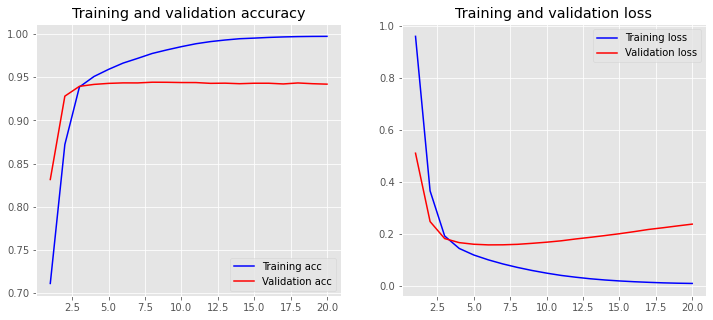

In [116]:
history = model_embedding2.fit(X_train_padded, y_train_onehot, epochs=20, verbose=2, validation_data=(X_test_padded, y_test_onehot), batch_size=1024)
loss, accuracy = model_embedding2.evaluate(X_train_padded, y_train_onehot, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_embedding2.evaluate(X_test_padded, y_test_onehot, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
# validation accuracy was at certain point 0.9442 (epoch 8) - still not able to suprase the tfidf linear svm model

In [47]:
# the same model with pretrained word embeddings

from keras import layers

embedding_dim = 300

model_embedding3 = Sequential()
model_embedding3.add(layers.Embedding(input_dim=vocab_size, weights=[embedding_matrix], trainable=False, 
                                      output_dim=embedding_dim, input_length=maxlen))
model_embedding3.add(layers.GlobalMaxPool1D())
model_embedding3.add(layers.Dense(10, activation='relu'))
model_embedding3.add(layers.Dense(4, activation='sigmoid'))
model_embedding3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_embedding3.summary()
history = model_embedding3.fit(X_train_padded, y_train_onehot, epochs=20, verbose=2, validation_data=(X_test_padded, y_test_onehot), batch_size=1024)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 564, 300)          12125100  
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                3010      
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 44        
Total params: 12,128,154
Trainable params: 3,054
Non-trainable params: 12,125,100
_________________________________________________________________
Epoch 1/20
96/96 - 70s - loss: 1.1731 - accuracy: 0.4824 - val_loss: 0.9823 - val_accuracy: 0.6982
Epoch 2/20
96/96 - 54s - loss: 0.8338 - accuracy: 0.7515 - val_loss: 0.6918 - val_accuracy: 0.7939
Epoch 3/20
96/96 - 50s - loss: 0.6105 

In [ ]:
# using pre-trained word embeddings performs worse than calculating the word embbeddings by ourselves

In [ ]:
# Let's go to the first model with tfidf information

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# import scipy
# from scipy import sparse
# from scipy.sparse import csr_matrix
# from scipy.sparse.csr_matrix import sort_indices

# training_features_tfidf_4_dnn = sort_indices(training_features_tfidf)
# y_train_onehot_tfidf_4_dnn = sort_indices(y_train_onehot)
# test_features_tfidf_4_dnn = sort_indices(test_features_tfidf)
# y_test_onehot_tfidf_4_dnn = sort_indices(y_test_onehot)

# from tensorflow.sparse import reorder

# training_features_tfidf_4_dnn = reorder(training_features_tfidf)
# y_train_onehot_tfidf_4_dnn = reorder(y_train_onehot)
# test_features_tfidf_4_dnn = reorder(test_features_tfidf)
# y_test_onehot_tfidf_4_dnn = reorder(y_test_onehot)

# print(training_features_tfidf.shape)
# print(train_features_cv.shape)

# putting a restricition on number of features so it will be abled to be inside a densed matrix
tfidf_vectorizer_dnn = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2), max_features=10000)

training_features_tfidf_dnn = tfidf_vectorizer_dnn.fit_transform(X_train).toarray()
test_features_tfidf_dnn = tfidf_vectorizer_dnn.transform(X_test).toarray()
# print(training_features_tfidf_dnn.shape)
print("Dense allocated")

Dense allocated


In [29]:
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers import LSTM  # , Flatten
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras import layers

input_dim = training_features_tfidf_dnn.shape  # Number of features
print(input_dim)
number_features = input_dim[1]

model_dnn_tfidf = Sequential()
input_tfidf = Input(shape=(number_features,))
# model_dnn_tfidf.add(layers.Dense(10, input_dim=number_features, activation='relu'))
# model_dnn_tfidf.add(layers.Dense(4, activation='sigmoid'))
dense = layers.Dense(10, input_dim=number_features, activation='relu')(input_tfidf)
outputs = layers.Dense(4, activation='sigmoid')(dense)

model_dnn_tfidf = Model(inputs=input_tfidf, outputs=outputs)

model_dnn_tfidf.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
model_dnn_tfidf.summary()
history = model_dnn_tfidf.fit(training_features_tfidf_dnn, y_train_onehot, epochs=115, verbose=2, validation_data=(test_features_tfidf_dnn, y_test_onehot), batch_size=10000)

(97998, 10000)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                100010    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 100,054
Trainable params: 100,054
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp8xmlu4o9.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filin

Epoch 66/1000
10/10 - 9s - loss: 0.1873 - accuracy: 0.9430 - val_loss: 0.2224 - val_accuracy: 0.9273
Epoch 67/1000
10/10 - 8s - loss: 0.1856 - accuracy: 0.9432 - val_loss: 0.2214 - val_accuracy: 0.9275
Epoch 68/1000
10/10 - 8s - loss: 0.1840 - accuracy: 0.9437 - val_loss: 0.2203 - val_accuracy: 0.9280
Epoch 69/1000
10/10 - 8s - loss: 0.1824 - accuracy: 0.9440 - val_loss: 0.2193 - val_accuracy: 0.9281
Epoch 70/1000
10/10 - 10s - loss: 0.1808 - accuracy: 0.9443 - val_loss: 0.2184 - val_accuracy: 0.9281
Epoch 71/1000
10/10 - 8s - loss: 0.1793 - accuracy: 0.9448 - val_loss: 0.2175 - val_accuracy: 0.9284
Epoch 72/1000
10/10 - 9s - loss: 0.1779 - accuracy: 0.9453 - val_loss: 0.2166 - val_accuracy: 0.9287
Epoch 73/1000
10/10 - 8s - loss: 0.1764 - accuracy: 0.9455 - val_loss: 0.2157 - val_accuracy: 0.9288
Epoch 74/1000
10/10 - 8s - loss: 0.1751 - accuracy: 0.9458 - val_loss: 0.2149 - val_accuracy: 0.9287
Epoch 75/1000
10/10 - 9s - loss: 0.1737 - accuracy: 0.9459 - val_loss: 0.2142 - val_accura

Epoch 147/1000
10/10 - 8s - loss: 0.1208 - accuracy: 0.9603 - val_loss: 0.2003 - val_accuracy: 0.9293
Epoch 148/1000
10/10 - 8s - loss: 0.1203 - accuracy: 0.9603 - val_loss: 0.2004 - val_accuracy: 0.9292
Epoch 149/1000
10/10 - 8s - loss: 0.1199 - accuracy: 0.9604 - val_loss: 0.2005 - val_accuracy: 0.9292
Epoch 150/1000
10/10 - 8s - loss: 0.1195 - accuracy: 0.9606 - val_loss: 0.2006 - val_accuracy: 0.9293
Epoch 151/1000
10/10 - 8s - loss: 0.1190 - accuracy: 0.9607 - val_loss: 0.2006 - val_accuracy: 0.9294
Epoch 152/1000
10/10 - 8s - loss: 0.1186 - accuracy: 0.9608 - val_loss: 0.2007 - val_accuracy: 0.9293
Epoch 153/1000
10/10 - 9s - loss: 0.1182 - accuracy: 0.9610 - val_loss: 0.2008 - val_accuracy: 0.9293
Epoch 154/1000
10/10 - 9s - loss: 0.1178 - accuracy: 0.9610 - val_loss: 0.2009 - val_accuracy: 0.9294
Epoch 155/1000
10/10 - 9s - loss: 0.1173 - accuracy: 0.9611 - val_loss: 0.2010 - val_accuracy: 0.9294
Epoch 156/1000
10/10 - 8s - loss: 0.1169 - accuracy: 0.9613 - val_loss: 0.2011 - v

Epoch 228/1000
10/10 - 8s - loss: 0.0937 - accuracy: 0.9683 - val_loss: 0.2151 - val_accuracy: 0.9269
Epoch 229/1000
10/10 - 8s - loss: 0.0935 - accuracy: 0.9685 - val_loss: 0.2153 - val_accuracy: 0.9268
Epoch 230/1000
10/10 - 8s - loss: 0.0932 - accuracy: 0.9685 - val_loss: 0.2156 - val_accuracy: 0.9266
Epoch 231/1000
10/10 - 9s - loss: 0.0929 - accuracy: 0.9685 - val_loss: 0.2159 - val_accuracy: 0.9266
Epoch 232/1000
10/10 - 9s - loss: 0.0927 - accuracy: 0.9686 - val_loss: 0.2162 - val_accuracy: 0.9266
Epoch 233/1000
10/10 - 9s - loss: 0.0924 - accuracy: 0.9686 - val_loss: 0.2164 - val_accuracy: 0.9263
Epoch 234/1000
10/10 - 9s - loss: 0.0922 - accuracy: 0.9687 - val_loss: 0.2167 - val_accuracy: 0.9262
Epoch 235/1000
10/10 - 10s - loss: 0.0919 - accuracy: 0.9688 - val_loss: 0.2170 - val_accuracy: 0.9262
Epoch 236/1000
10/10 - 9s - loss: 0.0917 - accuracy: 0.9688 - val_loss: 0.2173 - val_accuracy: 0.9262
Epoch 237/1000
10/10 - 9s - loss: 0.0914 - accuracy: 0.9689 - val_loss: 0.2176 - 

Epoch 309/1000
10/10 - 9s - loss: 0.0751 - accuracy: 0.9745 - val_loss: 0.2417 - val_accuracy: 0.9235
Epoch 310/1000
10/10 - 9s - loss: 0.0748 - accuracy: 0.9746 - val_loss: 0.2421 - val_accuracy: 0.9234
Epoch 311/1000
10/10 - 9s - loss: 0.0747 - accuracy: 0.9747 - val_loss: 0.2425 - val_accuracy: 0.9234
Epoch 312/1000
10/10 - 8s - loss: 0.0744 - accuracy: 0.9747 - val_loss: 0.2429 - val_accuracy: 0.9236
Epoch 313/1000
10/10 - 9s - loss: 0.0742 - accuracy: 0.9748 - val_loss: 0.2433 - val_accuracy: 0.9234
Epoch 314/1000
10/10 - 8s - loss: 0.0740 - accuracy: 0.9749 - val_loss: 0.2436 - val_accuracy: 0.9234
Epoch 315/1000
10/10 - 8s - loss: 0.0738 - accuracy: 0.9749 - val_loss: 0.2440 - val_accuracy: 0.9236
Epoch 316/1000
10/10 - 8s - loss: 0.0736 - accuracy: 0.9750 - val_loss: 0.2444 - val_accuracy: 0.9234
Epoch 317/1000
10/10 - 8s - loss: 0.0734 - accuracy: 0.9750 - val_loss: 0.2449 - val_accuracy: 0.9233
Epoch 318/1000
10/10 - 8s - loss: 0.0732 - accuracy: 0.9752 - val_loss: 0.2452 - v

Epoch 390/1000
10/10 - 8s - loss: 0.0594 - accuracy: 0.9807 - val_loss: 0.2772 - val_accuracy: 0.9200
Epoch 391/1000
10/10 - 9s - loss: 0.0592 - accuracy: 0.9807 - val_loss: 0.2776 - val_accuracy: 0.9202
Epoch 392/1000
10/10 - 9s - loss: 0.0591 - accuracy: 0.9807 - val_loss: 0.2781 - val_accuracy: 0.9200
Epoch 393/1000
10/10 - 9s - loss: 0.0589 - accuracy: 0.9809 - val_loss: 0.2786 - val_accuracy: 0.9201
Epoch 394/1000
10/10 - 8s - loss: 0.0587 - accuracy: 0.9809 - val_loss: 0.2791 - val_accuracy: 0.9200
Epoch 395/1000
10/10 - 9s - loss: 0.0585 - accuracy: 0.9811 - val_loss: 0.2796 - val_accuracy: 0.9199
Epoch 396/1000
10/10 - 8s - loss: 0.0583 - accuracy: 0.9811 - val_loss: 0.2800 - val_accuracy: 0.9199
Epoch 397/1000
10/10 - 8s - loss: 0.0582 - accuracy: 0.9811 - val_loss: 0.2805 - val_accuracy: 0.9199
Epoch 398/1000
10/10 - 8s - loss: 0.0580 - accuracy: 0.9811 - val_loss: 0.2810 - val_accuracy: 0.9201
Epoch 399/1000
10/10 - 8s - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.2815 - v

Epoch 471/1000
10/10 - 8s - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.3191 - val_accuracy: 0.9173
Epoch 472/1000
10/10 - 8s - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.3196 - val_accuracy: 0.9174
Epoch 473/1000
10/10 - 8s - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.3201 - val_accuracy: 0.9174
Epoch 474/1000
10/10 - 8s - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.3207 - val_accuracy: 0.9174
Epoch 475/1000
10/10 - 8s - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.3213 - val_accuracy: 0.9173
Epoch 476/1000
10/10 - 9s - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.3218 - val_accuracy: 0.9172
Epoch 477/1000
10/10 - 8s - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.3224 - val_accuracy: 0.9174
Epoch 478/1000
10/10 - 8s - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.3229 - val_accuracy: 0.9173
Epoch 479/1000
10/10 - 7s - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.3235 - val_accuracy: 0.9176
Epoch 480/1000
10/10 - 8s - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.3240 - v

Epoch 552/1000
10/10 - 8s - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.3661 - val_accuracy: 0.9164
Epoch 553/1000
10/10 - 8s - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.3667 - val_accuracy: 0.9165
Epoch 554/1000
10/10 - 8s - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.3673 - val_accuracy: 0.9165
Epoch 555/1000
10/10 - 8s - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.3679 - val_accuracy: 0.9164
Epoch 556/1000
10/10 - 8s - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.3685 - val_accuracy: 0.9164
Epoch 557/1000
10/10 - 8s - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.3692 - val_accuracy: 0.9163
Epoch 558/1000
10/10 - 8s - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.3697 - val_accuracy: 0.9164
Epoch 559/1000
10/10 - 8s - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.3704 - val_accuracy: 0.9164
Epoch 560/1000
10/10 - 7s - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.3710 - val_accuracy: 0.9163
Epoch 561/1000
10/10 - 8s - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.3716 - v

Epoch 633/1000
10/10 - 8s - loss: 0.0281 - accuracy: 0.9920 - val_loss: 0.4175 - val_accuracy: 0.9159
Epoch 634/1000
10/10 - 9s - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.4181 - val_accuracy: 0.9158
Epoch 635/1000
10/10 - 8s - loss: 0.0280 - accuracy: 0.9919 - val_loss: 0.4187 - val_accuracy: 0.9158
Epoch 636/1000
10/10 - 9s - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.4193 - val_accuracy: 0.9157
Epoch 637/1000
10/10 - 8s - loss: 0.0278 - accuracy: 0.9920 - val_loss: 0.4200 - val_accuracy: 0.9158
Epoch 638/1000
10/10 - 8s - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.4208 - val_accuracy: 0.9159
Epoch 639/1000
10/10 - 8s - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.4214 - val_accuracy: 0.9158
Epoch 640/1000
10/10 - 9s - loss: 0.0276 - accuracy: 0.9920 - val_loss: 0.4221 - val_accuracy: 0.9158
Epoch 641/1000
10/10 - 8s - loss: 0.0275 - accuracy: 0.9921 - val_loss: 0.4226 - val_accuracy: 0.9158
Epoch 642/1000
10/10 - 8s - loss: 0.0274 - accuracy: 0.9921 - val_loss: 0.4233 - v

Epoch 714/1000
10/10 - 9s - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.4710 - val_accuracy: 0.9153
Epoch 715/1000
10/10 - 8s - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.4716 - val_accuracy: 0.9151
Epoch 716/1000
10/10 - 8s - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.4724 - val_accuracy: 0.9153
Epoch 717/1000
10/10 - 9s - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.4731 - val_accuracy: 0.9151
Epoch 718/1000
10/10 - 8s - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.4737 - val_accuracy: 0.9151
Epoch 719/1000
10/10 - 8s - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.4744 - val_accuracy: 0.9150
Epoch 720/1000
10/10 - 8s - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.4750 - val_accuracy: 0.9151
Epoch 721/1000
10/10 - 9s - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.4756 - val_accuracy: 0.9149
Epoch 722/1000
10/10 - 9s - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.4764 - val_accuracy: 0.9149
Epoch 723/1000
10/10 - 8s - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.4770 - v

Epoch 795/1000
10/10 - 9s - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.5259 - val_accuracy: 0.9131
Epoch 796/1000
10/10 - 9s - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.5266 - val_accuracy: 0.9131
Epoch 797/1000
10/10 - 8s - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.5272 - val_accuracy: 0.9130
Epoch 798/1000
10/10 - 8s - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.5280 - val_accuracy: 0.9132
Epoch 799/1000
10/10 - 8s - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.5287 - val_accuracy: 0.9133
Epoch 800/1000
10/10 - 9s - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.5293 - val_accuracy: 0.9131
Epoch 801/1000
10/10 - 8s - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.5302 - val_accuracy: 0.9130
Epoch 802/1000
10/10 - 10s - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.5307 - val_accuracy: 0.9129
Epoch 803/1000
10/10 - 8s - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.5314 - val_accuracy: 0.9129
Epoch 804/1000
10/10 - 8s - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.5321 - 

Epoch 876/1000
10/10 - 9s - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.5820 - val_accuracy: 0.9113
Epoch 877/1000
10/10 - 9s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.5827 - val_accuracy: 0.9116
Epoch 878/1000
10/10 - 8s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.5834 - val_accuracy: 0.9115
Epoch 879/1000
10/10 - 8s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.5842 - val_accuracy: 0.9115
Epoch 880/1000
10/10 - 8s - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.5847 - val_accuracy: 0.9116
Epoch 881/1000
10/10 - 9s - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.5855 - val_accuracy: 0.9114
Epoch 882/1000
10/10 - 9s - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.5861 - val_accuracy: 0.9115
Epoch 883/1000
10/10 - 9s - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.5867 - val_accuracy: 0.9115
Epoch 884/1000
10/10 - 9s - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.5875 - val_accuracy: 0.9115
Epoch 885/1000
10/10 - 9s - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.5882 - v

Epoch 957/1000
10/10 - 8s - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.6369 - val_accuracy: 0.9103
Epoch 958/1000
10/10 - 8s - loss: 0.0147 - accuracy: 0.9947 - val_loss: 0.6377 - val_accuracy: 0.9102
Epoch 959/1000
10/10 - 8s - loss: 0.0147 - accuracy: 0.9947 - val_loss: 0.6382 - val_accuracy: 0.9101
Epoch 960/1000
10/10 - 8s - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.6389 - val_accuracy: 0.9103
Epoch 961/1000
10/10 - 8s - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.6398 - val_accuracy: 0.9102
Epoch 962/1000
10/10 - 8s - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.6404 - val_accuracy: 0.9101
Epoch 963/1000
10/10 - 8s - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.6408 - val_accuracy: 0.9101
Epoch 964/1000
10/10 - 9s - loss: 0.0146 - accuracy: 0.9948 - val_loss: 0.6417 - val_accuracy: 0.9102
Epoch 965/1000
10/10 - 7s - loss: 0.0146 - accuracy: 0.9947 - val_loss: 0.6422 - val_accuracy: 0.9101
Epoch 966/1000
10/10 - 8s - loss: 0.0145 - accuracy: 0.9947 - val_loss: 0.6429 - v

In [ ]:
# best epoch was 113

In [30]:
loss, accuracy = model_dnn_tfidf.evaluate(training_features_tfidf_dnn, y_train_onehot, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_dnn_tfidf.evaluate(test_features_tfidf_dnn, y_test_onehot, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9950
Testing Accuracy:  0.9098


In [ ]:
# I ga gave it to run over night with too many epochs (1000) - this why there is overfitting here. 
# However, best validation accuracy was still 93%
# when running it again I run it with 115 epochs

In [108]:
# Let's try the naive averaging aproach Yoni advised me over the phone

In [37]:
import keras

vocab_size = len(tokenizer.word_index) + 1
embedding_size = 300

input_text = Input(shape=(maxlen,))

embedding = Embedding(vocab_size, embedding_size, input_length=maxlen)(input_text)

mean_embedding = keras.layers.Lambda(lambda x: keras.backend.mean(x, axis=1))(embedding)

dense1 = Dense(256, activation='relu')(mean_embedding)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(4, activation='sigmoid')(dense2)

model_mean = Model(inputs=input_text, outputs=dense3)

model_mean.summary()

model_mean.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 564)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 564, 300)          12125100  
_________________________________________________________________
lambda_1 (Lambda)            (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               77056     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 132       
Total params: 12,210,512
Trainable params: 12,210,512
Non-trainable params: 0
_______________________________________________

In [38]:
history = model_mean.fit(X_train_padded, y_train_onehot, epochs=60, verbose=2, validation_data=(X_test_padded, y_test_onehot), batch_size=10000)

Epoch 1/100
10/10 - 89s - loss: 1.3588 - accuracy: 0.3085 - val_loss: 1.3362 - val_accuracy: 0.3073
Epoch 2/100
10/10 - 78s - loss: 1.3294 - accuracy: 0.3085 - val_loss: 1.3240 - val_accuracy: 0.3073
Epoch 3/100
10/10 - 80s - loss: 1.3227 - accuracy: 0.3100 - val_loss: 1.3197 - val_accuracy: 0.3154
Epoch 4/100
10/10 - 78s - loss: 1.3199 - accuracy: 0.3246 - val_loss: 1.3181 - val_accuracy: 0.3210
Epoch 5/100
10/10 - 79s - loss: 1.3181 - accuracy: 0.3150 - val_loss: 1.3158 - val_accuracy: 0.3209
Epoch 6/100
10/10 - 78s - loss: 1.3153 - accuracy: 0.3649 - val_loss: 1.3123 - val_accuracy: 0.3329
Epoch 7/100
10/10 - 80s - loss: 1.3107 - accuracy: 0.3717 - val_loss: 1.3059 - val_accuracy: 0.4334
Epoch 8/100
10/10 - 80s - loss: 1.3019 - accuracy: 0.3983 - val_loss: 1.2935 - val_accuracy: 0.4345
Epoch 9/100
10/10 - 82s - loss: 1.2845 - accuracy: 0.4125 - val_loss: 1.2688 - val_accuracy: 0.4716
Epoch 10/100
10/10 - 88s - loss: 1.2508 - accuracy: 0.4672 - val_loss: 1.2231 - val_accuracy: 0.5085

KeyboardInterrupt: 

In [ ]:
# stopped because it started overfitting. The best epoch is around 60 - yielding 92.8% validation accuracy

In [ ]:
# The same model as above but with pretrained word embeddings

In [46]:
import keras

vocab_size = len(tokenizer.word_index) + 1
embedding_size = 300

input_text = Input(shape=(maxlen,))

embedding = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False, input_length=maxlen)(input_text)

mean_embedding = keras.layers.Lambda(lambda x: keras.backend.mean(x, axis=1))(embedding)

dense1 = Dense(256, activation='relu')(mean_embedding)
dense2 = Dense(32, activation='relu')(dense1)
dense3 = Dense(4, activation='sigmoid')(dense2)

model_mean2 = Model(inputs=input_text, outputs=dense3)

model_mean2.summary()

model_mean2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_mean2.fit(X_train_padded, y_train_onehot, epochs=100, verbose=2, validation_data=(X_test_padded, y_test_onehot), batch_size=10000)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 564)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 564, 300)          12125100  
_________________________________________________________________
lambda_2 (Lambda)            (None, 300)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 132       
Total params: 12,210,512
Trainable params: 85,412
Non-trainable params: 12,125,100
__________________________________________

Epoch 71/100
10/10 - 41s - loss: 0.2916 - accuracy: 0.8959 - val_loss: 0.2962 - val_accuracy: 0.8939
Epoch 72/100
10/10 - 42s - loss: 0.2905 - accuracy: 0.8967 - val_loss: 0.2957 - val_accuracy: 0.8942
Epoch 73/100
10/10 - 42s - loss: 0.2896 - accuracy: 0.8969 - val_loss: 0.2954 - val_accuracy: 0.8940
Epoch 74/100
10/10 - 46s - loss: 0.2888 - accuracy: 0.8971 - val_loss: 0.2942 - val_accuracy: 0.8939
Epoch 75/100
10/10 - 43s - loss: 0.2876 - accuracy: 0.8971 - val_loss: 0.2938 - val_accuracy: 0.8951
Epoch 76/100
10/10 - 43s - loss: 0.2868 - accuracy: 0.8979 - val_loss: 0.2929 - val_accuracy: 0.8946
Epoch 77/100
10/10 - 46s - loss: 0.2857 - accuracy: 0.8982 - val_loss: 0.2917 - val_accuracy: 0.8958
Epoch 78/100
10/10 - 45s - loss: 0.2848 - accuracy: 0.8986 - val_loss: 0.2909 - val_accuracy: 0.8948
Epoch 79/100
10/10 - 44s - loss: 0.2842 - accuracy: 0.8993 - val_loss: 0.2901 - val_accuracy: 0.8958
Epoch 80/100
10/10 - 47s - loss: 0.2833 - accuracy: 0.8996 - val_loss: 0.2892 - val_accurac

In [ ]:
# A bit worse than the previous model with training word embeddings (unlike this one with pretrained word embeddings). 
# Explanantion can be: due to the low precentage of coverage of words

In [1]:
print(my_service.run("isosceles traingle"))  # Should be Math
print(my_service.run("quantum protons and electrons"))  # should be Physics
print(my_service.run("intra cell mitochondria"))  # Should be Biology
print(my_service.run("the periodic table of elements"))  # Should be Chemistry

NameError: name 'my_service' is not defined